In [ ]:
#Objective: 
# Predict house prices using property features such as size, bedrooms, and location.

In [41]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [43]:
# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\Zahra\Desktop\Developers hub internship AI-ML\kc_house_data.csv")  # Replace with your path
print(df.head())
print(df.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [45]:
# Step 3: Select relevant features
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'zipcode']
X = df[features]
y = df['price']

In [47]:
# Step 4: Encode categorical features (zipcode)
X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)


In [49]:
# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Step 7a: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

In [55]:
# Step 7b: Gradient Boosting
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
gbr_preds = gbr.predict(X_test_scaled)

In [65]:
# Step 8: Evaluation
def evaluate_model(name, y_test, preds):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Gradient Boosting", y_test, gbr_preds)


Linear Regression Performance:
MAE: 113721.63802783951
RMSE: 201328.3183761953

Gradient Boosting Performance:
MAE: 124261.04106534476
RMSE: 216355.43905324466


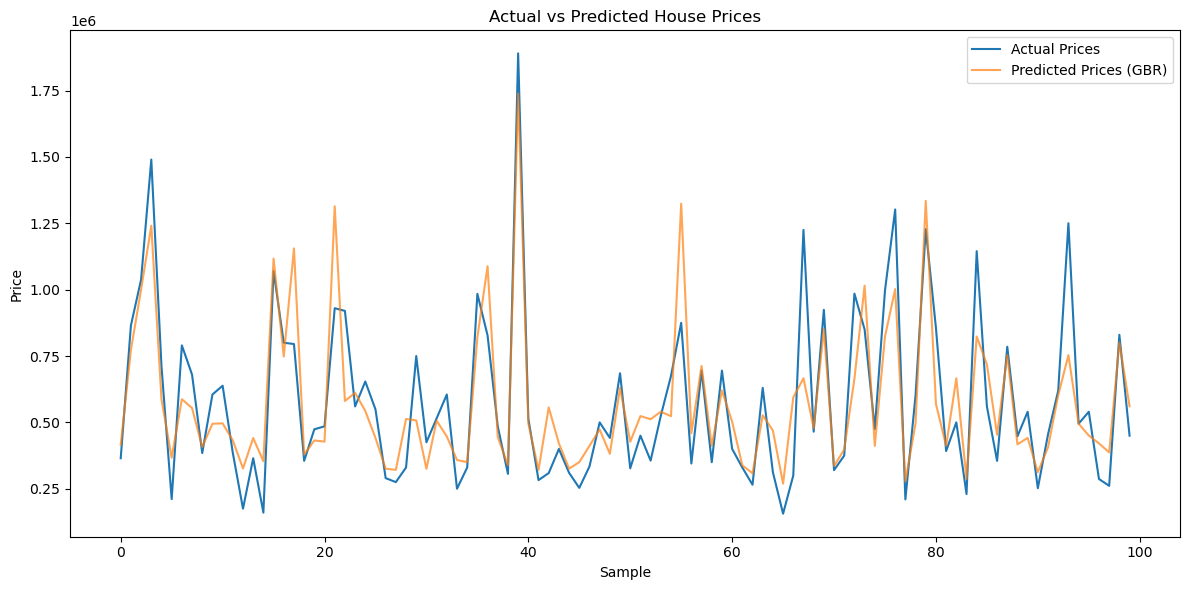

In [61]:
# Step 9: Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Prices')
plt.plot(gbr_preds[:100], label='Predicted Prices (GBR)', alpha=0.7)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Final Insights – Task 6: House Price Prediction

#The dataset contains rich features such as square footage, bedrooms, and location (zipcode).
#After preprocessing and encoding, two models were tested:
   #Linear Regression
   #Gradient Boosting Regressor
#Gradient Boosting performed better with **lower MAE and RMSE** values.
#Zipcode significantly affects pricing — proving location is key in real estate.
# The model is capable of predicting house prices with reasonable accuracy.
